# Examaning your Data

- #### Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
- #### Univariable study. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
- #### Multivariate study. We'll try to understand how the dependent variable and independent variables relate.
- #### Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.
- #### Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.

In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Set the option to display maximum rows to a high number
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)


#bring in the six packs
df_train = pd.read_csv('Dataset/train.csv')
#bring in the six packs
df_test = pd.read_csv('Dataset/test.csv')
#bring in the six packs
df_sample_submission = pd.read_csv('Dataset/sample_submission.csv')

### Simple Overview of the Data

#### The data is about Housing Prices

- ### Target: SalePrice

In [2]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

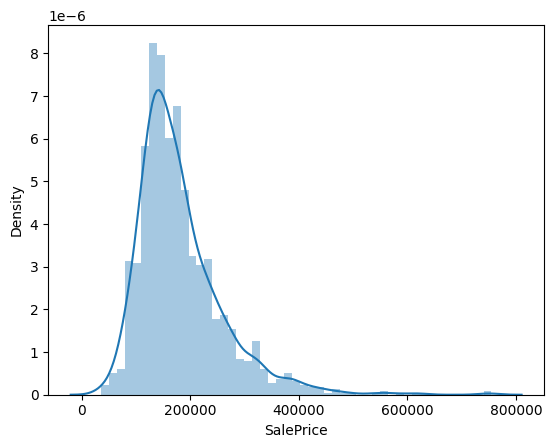

In [3]:
#histogram
sns.distplot(df_train['SalePrice'])

In [4]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282



 kurtosis value higher than 3 suggests that the distribution has fatter tails than a normal distribution (i.e., it is leptokurtic)


- Deviate from the normal distribution.
- Have appreciable positive skewness: This means that there are more extreme values on the right side, and the distribution is stretched in that direction.
- Show peakedness: Leptokurtic (High Peakedness): Indicates a higher probability of extreme values in the distribution. It means that the data has more outliers and is more prone to extreme events.

# Get Most Important Variables

- Import from my DataExplorationToolkit the method most_important_features:
    - Correlation
    - Tree Based Feature Importance
    

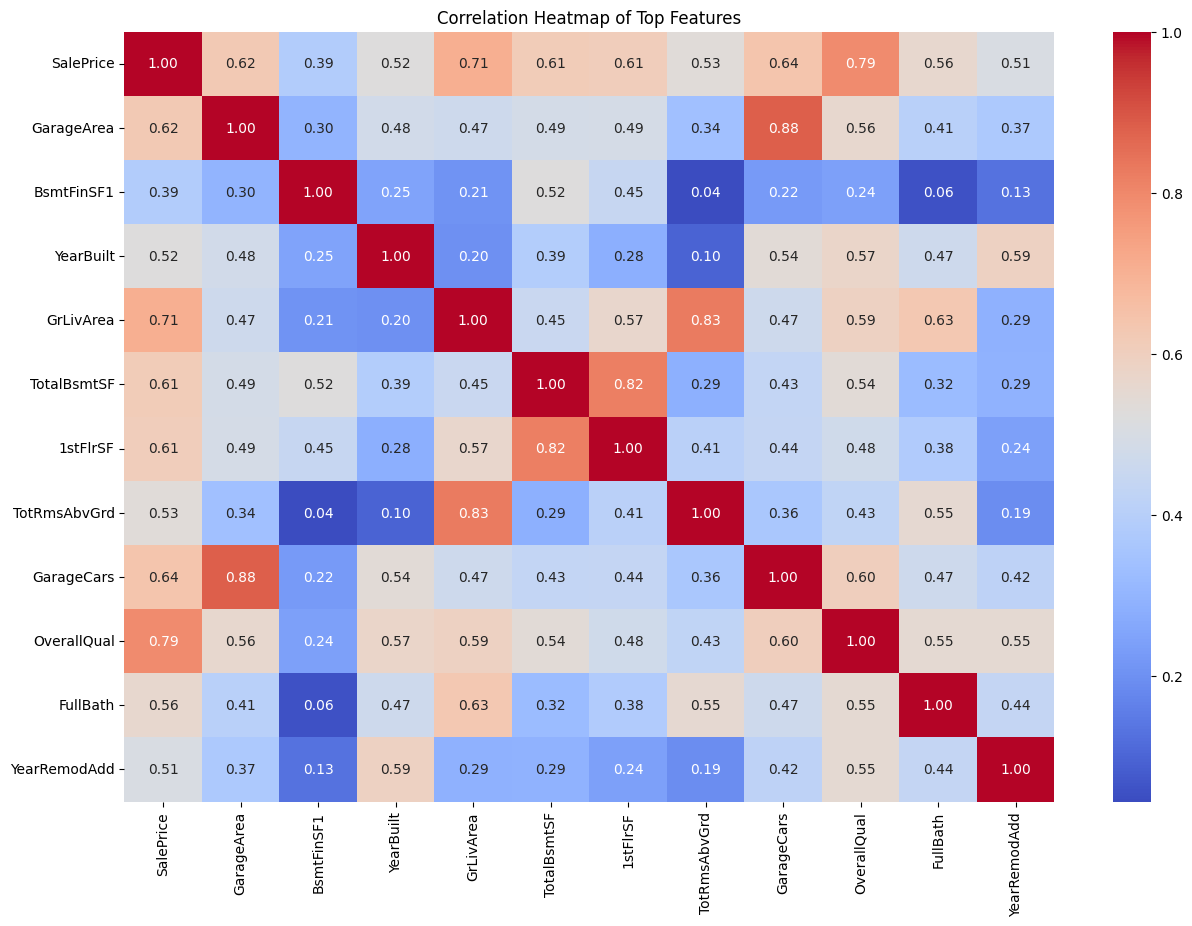

In [5]:
import DataExplorationToolkit as dtl
most_important_variables=dtl.most_important_features(df_train,'SalePrice',15,['Id'])

subset_df = df_train[most_important_variables]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Top Features')
plt.show()

In [6]:
# Split Columns into numerical and categorical

max_value_for_categorical=20
cat_col_forced=['OverallQual']
all_columns=dtl.return_categorical_numerical_columns(subset_df,cat_col_forced,max_value_for_categorical)
cat_cols=all_columns[0]#categorical Columns
num_cols=all_columns[1]#numerical Columns




## - Relationship with categorical features

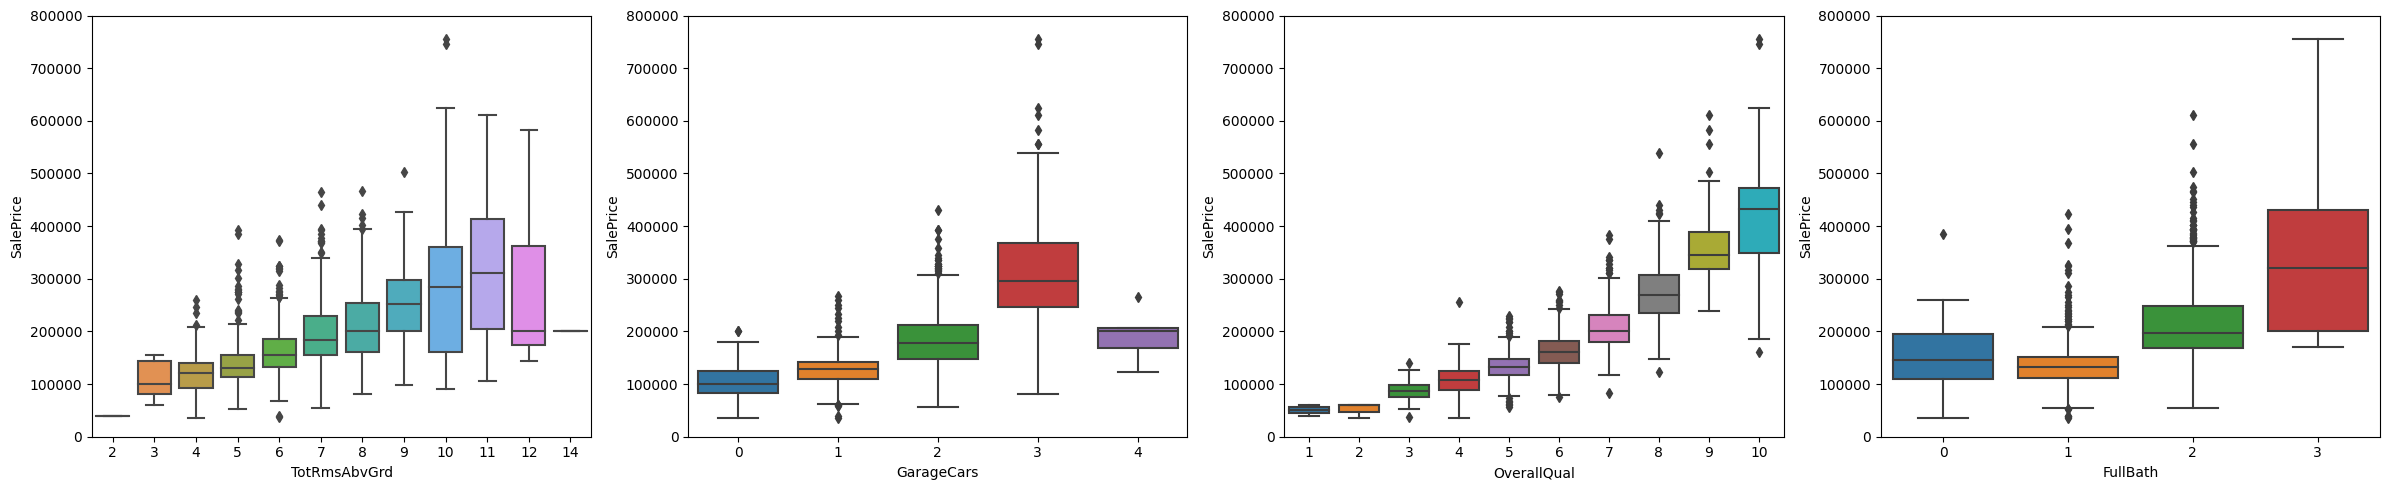

In [26]:

# Create a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=len(cat_cols), figsize=(6*len(cat_cols), 5))

# Iterate through the categorical columns
for i, var in enumerate(cat_cols):
    data = pd.concat([subset_df['SalePrice'], subset_df[var]], axis=1)
    
    # Create a box plot
    sns.boxplot(x=var, y="SalePrice", data=data, ax=axes[i])
    axes[i].set_ylim(0, 800000)  # Set y-axis limits

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## - Relationship with numerical features

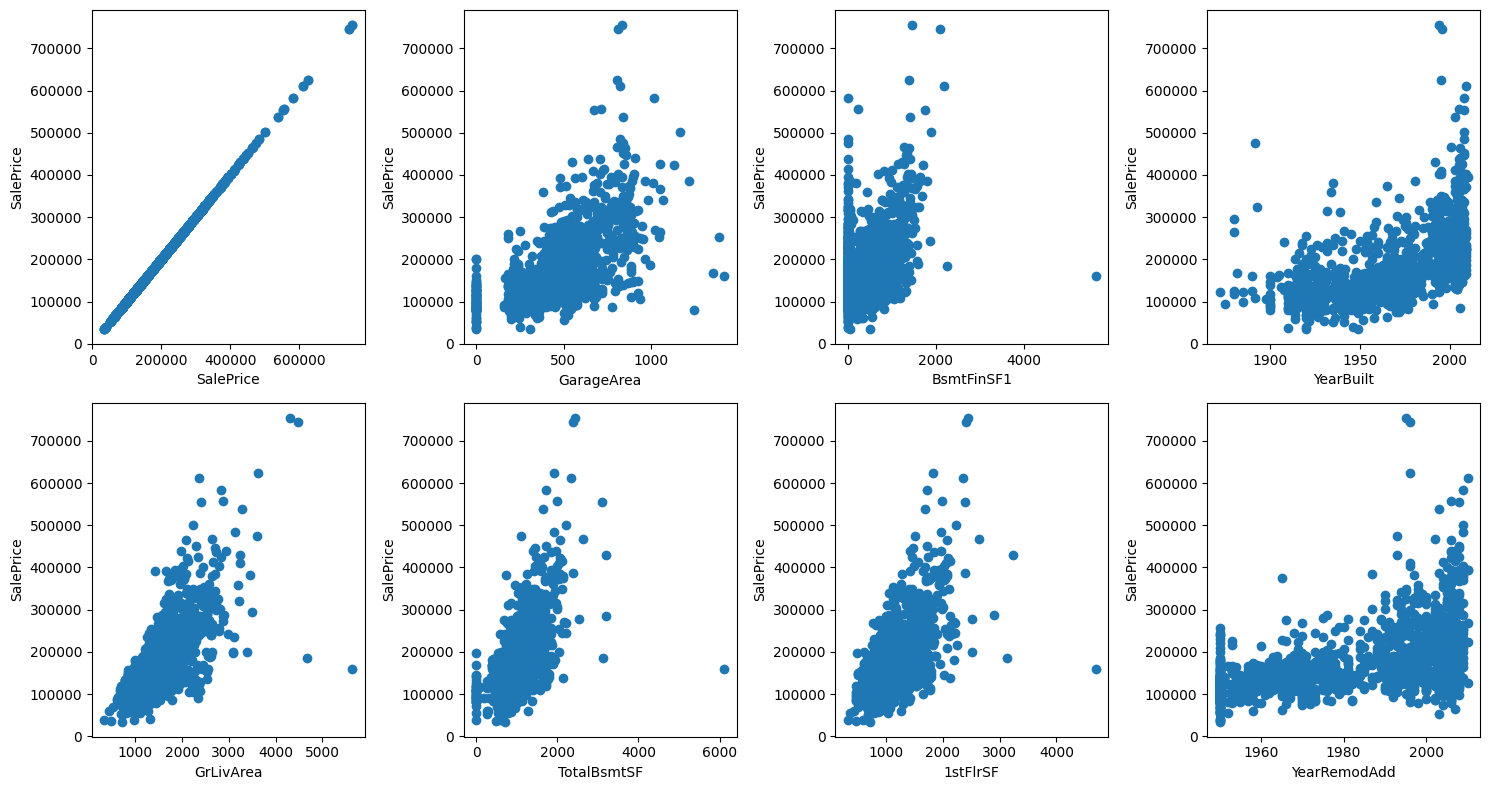

In [28]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=len(num_cols)//2, figsize=(15, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the numerical columns
for i, var in enumerate(num_cols):
    data = pd.concat([subset_df['SalePrice'], subset_df[var]], axis=1)
    
    # Create a scatter plot
    axes[i].scatter(data[var], data['SalePrice'])
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('SalePrice')
    
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()